In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
%matplotlib inline

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print('Number of training examples: ', str(mnist.train.images.shape[0]))
print('Number of testing examples: ', str(mnist.test.images.shape[0]))
print('Shape of training images: ', str(mnist.train.images.shape))
print('Shape of training labels: ', str(mnist.train.labels.shape))
print('Shape of testing images: ', str(mnist.test.images.shape))
print('Shape of testing labels: ', str(mnist.test.labels.shape))

('Number of training examples: ', '55000')
('Number of testing examples: ', '10000')
('Shape of training images: ', '(55000, 784)')
('Shape of training labels: ', '(55000, 10)')
('Shape of testing images: ', '(10000, 784)')
('Shape of testing labels: ', '(10000, 10)')


label = 6


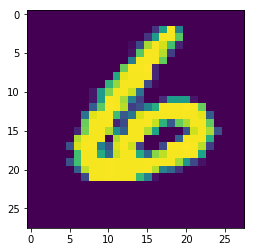

In [4]:
# Example of a picture
index = 159
plt.imshow(mnist.train.images[index].reshape(28,28))
print ("label = " + str(mnist.train.labels[index].argmax()))

In [5]:
sess = tf.InteractiveSession()

In [6]:
def create_placeholders(n_H0, n_W0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_y -- scalar, number of classes
    """
    X = tf.placeholder(dtype = tf.float32, shape = [None, n_H0 * n_W0]) # 28 x 28 pixels
    Y = tf.placeholder(dtype = tf.float32, shape = [None, n_y]) # 10 labels   
    return X, Y

In [7]:
x, y_ = create_placeholders(28, 28, 10)
print ("x = " + str(x))
print ("y_ = " + str(y_))

x = Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
y_ = Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [8]:
# Start to build a multilayer CNN:

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding= 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1],
                          padding = 'SAME')

In [9]:
# Implements the forward propagation for the model:
#     CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
# THIS IS THE FIRST CONV LAYER:
# The shape has four paras, the first two are the patch size,
# the third one is the number of input channels, the last one
# is the number of output channels.
W_conv1 = weight_variable([5, 5, 1, 32])
# bias has a vector, each output channel has one bias
b_conv1 = bias_variable([32])
# Reshape the input image, the 2 and 3 paras are width and height,
# the last para is the number of input image channel
x_image = tf.reshape(x, [-1, 28, 28, 1])
# do the convolve and plus bias and apply relu func
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
# do the max pooling operation
h_pool1 = max_pool_2x2(h_conv1)

In [10]:
# THIS IS THE SECOND CONV LAYER:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [11]:
# THIS IS DENSELY CONNECTED LAYER:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [12]:
# THIS IS DROPOUT:
# We keep a placeholder for threshold of dropout, turn it on when
# training, and turn if off when testing
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [13]:
# THIS IS READOUT LAYER:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [14]:
# TRAIN AND EVALUATE THE MODEL
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
# in tf.augmax(p1, p2), p2 is axis
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [15]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(1000):
    batch = mnist.train.next_batch(50)
    if i % 200 == 0:
      train_accuracy = accuracy.eval(feed_dict={
          x: batch[0], y_: batch[1], keep_prob: 1.0})
      print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.06
step 200, training accuracy 0.9
step 400, training accuracy 0.92
step 600, training accuracy 0.98
step 800, training accuracy 0.96


In [18]:
  print('test accuracy %g' % accuracy.eval(feed_dict={
      x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[Node: Variable/read = Identity[T=DT_FLOAT, _class=["loc:@Variable"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable)]]

Caused by op u'Variable/read', defined at:
  File "/Users/wangying/anaconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/wangying/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-48a89ef44e3d>", line 7, in <module>
    W_conv1 = weight_variable([5, 5, 1, 32])
  File "<ipython-input-8-b09697bd854d>", line 5, in weight_variable
    return tf.Variable(initial)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 199, in __init__
    expected_shape=expected_shape)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 330, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1400, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/wangying/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable
	 [[Node: Variable/read = Identity[T=DT_FLOAT, _class=["loc:@Variable"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable)]]


In [ ]:
def plot_predictions(image_list, output_probs=False, adversarial=False):
    '''
    Evaluate images against trained model and plot images.
    If adversarial == True, replace middle image title appropriately
    Return probability list if output_probs == True
    '''
    prob = y.eval(feed_dict={x: image_list, keep_prob: 1.0})
    
    pred_list = np.zeros(len(image_list)).astype(int)
    pct_list = np.zeros(len(image_list)).astype(int)
    
    # Setup image grid
    import math
    cols = 3
    rows = math.ceil(image_list.shape[0]/cols)
    fig = plt.figure(1, (12., 12.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),  # creates grid of axes
                     axes_pad=0.5,  # pad between axes in inch.
                     )
    
    # Get probs, images and populate grid
    for i in range(len(prob)):
        pred_list[i] = np.argmax(prob[i]) # for mnist index == classification
        pct_list[i] = prob[i][pred_list[i]] * 100

        image = image_list[i].reshape(28,28)
        grid[i].imshow(image)
        
        grid[i].set_title('Label: {0} \nCertainty: {1}%' \
                          .format(pred_list[i], 
                                  pct_list[i]))
        
        # Only use when plotting original, partial deriv and adversarial images
        if (adversarial) & (i % 3 == 1): 
            grid[i].set_title("Adversarial \nPartial Derivatives")
        
    plt.show()
    
    return prob if output_probs else None